In [9]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../')  # Add the parent directory to the system path to allow module imports from outside the current directory.
import OCPY as op  # Import the custom library 'OCPY' and alias it as 'op' for easier access.
import numpy as np  # Import NumPy for numerical operations.

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
x = np.linspace(-30000, 55000, 60000)  # Create an array of epochs where the model will be applied.

In [11]:
lite_params = {"amp": 300, "P_LiTE": 20000, "T_LiTE": 20000, "e": 0.35, "omega": 34}  
# Define parameters for the LiTE (Light-Time Effect) model.

lite = op.LiTE(params=lite_params)  
# Create a LiTE model using the defined parameters.

lite.name = "LTE"
# Components also have 'name' parameters. It's nessesarry to be changed if you will use same component in model more than once. 

print(lite.params)  
# Print the LiTE model parameters. At this point, they are set to default values since they haven't been explicitly assigned yet.

{'e': 0.35 Unitless, 'amp': 300 day, 'omega': 34 deg, 'P_LiTE': 20000 epoch, 'T_LiTE': 20000 epoch}


In [12]:
lite.amp = 5  
# The parameters can be modified directly by accessing them through the 'LiTE' object.

print(lite.params)  
# Print the updated LiTE model parameters after modifying 'amp'.

{'e': 0.35 Unitless, 'amp': 5 day, 'omega': 34 deg, 'P_LiTE': 20000 epoch, 'T_LiTE': 20000 epoch}


e= 0.35


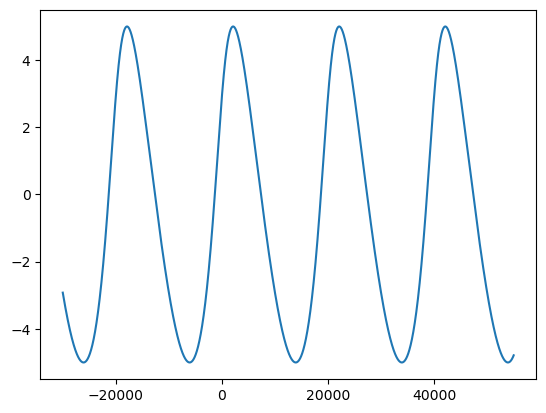

In [13]:
from matplotlib import pyplot as plt  

model_values = lite.individual_model(x)  
# Compute the model's y-values (if its computable) for the given epoch values using the LiTE model.

plt.plot(x, model_values)  
# Plot the computed model values against the epoch values.

plt.show()  
# Display the plot.

e= 0.35


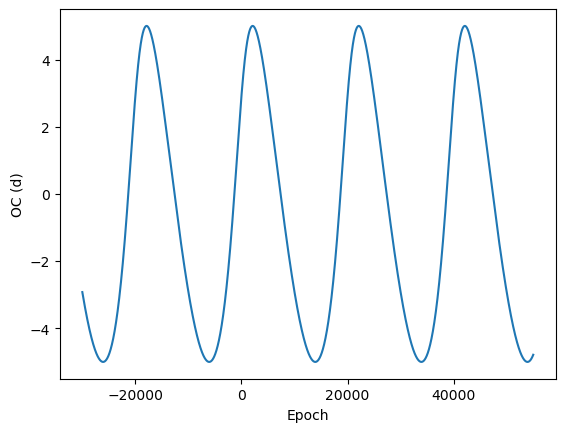

In [14]:
lite.plot(x)  
# The same plot can be generated using the 'plot' function of the LiTE model.

In [15]:
lite.amp = op.Parameter(10, "year")  
# The 'Parameter' class can be used to modify attributes while specifying their units.

print(lite.params)  
# Print the updated parameters of the LiTE model.

{'e': 0.35 Unitless, 'amp': 10 year, 'omega': 34 deg, 'P_LiTE': 20000 epoch, 'T_LiTE': 20000 epoch}


In [16]:
lite.amp = 8  
# Assigning a new value does not change the unit of the parameter.

print(lite.amp)  
# Print the updated value of 'amp'. The unit remains the same as previously set (which is year for this case).

8 year


e= 0.35


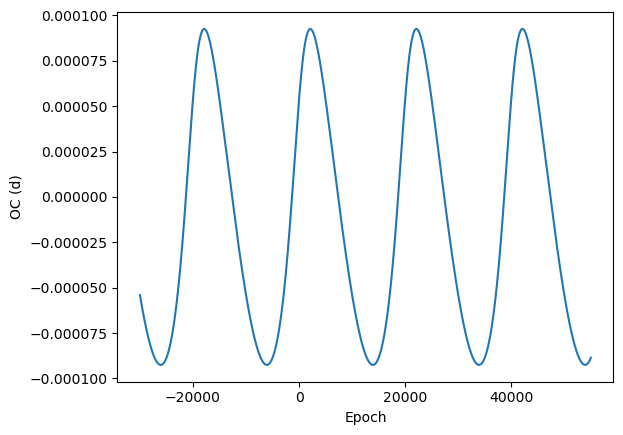

In [17]:
lite.amp.unit = "second"  
# The unit of the parameter can be changed explicitly.

lite.plot(x)  
# The calculations are performed based on the most recently assigned unit.

In [18]:
lite.P_LiTE.unit = "day"  
# If a conversion between epochs and other time units is needed, the software requires a 'Ref_period' value (also known as P_0 of system).

lite.individual_model(x)  
# Attempting to compute the model without a defined 'P' value will result in an error.

ValueError: Ref_period is required for converting the unit named 'P_LiTE' to epoch.

e= 0.35


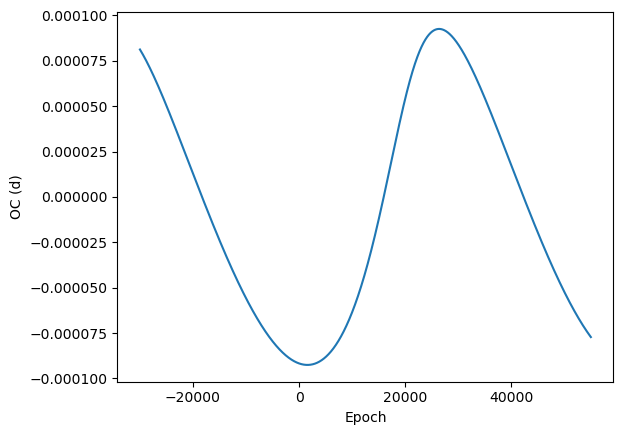

In [19]:
lite.Ref_period = 0.33  
# The reference period value can be assigned directly to the object.

lite.plot(x)  
# Plot the model using the newly assigned reference period.

In [20]:
summary = lite.summary(show=False, return_type="dict")  
# Retrieve the summary of the 'lite' object as a dictionary without displaying it.

print(summary)  
# Print the summary.

{'name': 'LTE', 'e': 0.35 Unitless, 'amp': 8 second, 'omega': 34 deg, 'P_LiTE': 20000 day, 'T_LiTE': 20000 epoch}


In [21]:
# Instance of every model component is below:

lin_model = op.Lin(params={"dP": -0.0045, "dT": 0.73})  
# Linear model with dP = -0.0045 (change in period), dT = 0.73 (time shift)

quad_model = op.Quad(params={"Q": 3.2e-7})  
# Quadratic model with Q = 3.2e-7 (quadratic term affecting period evolution)

lite_model = op.LiTE(params={
    "e": 0.42,  # Eccentricity
    "omega": 127,  # Argument of periapsis in degrees
    "P_LiTE": 14500,  # Orbital period in epochs
    "T_LiTE": 23000,  # Time of periastron passage in epochs
    "amp": 35  # Amplitude in days
})  
# LiTE model simulating a light-time effect in a binary or planetary system

lite_abspar_model = op.LiTE_abspar(params={
    "mass": 3.6,  # Mass of companion in solar masses
    "P_LiTE": 29000,  # Orbital period in epochs
    "ecc": 0.19,  # Eccentricity
    "omega": 305,  # Argument of periapsis in degrees
    "T_LiTE": 18500,  # Time of periastron passage in epochs
    "inc": 67  # Inclination in degrees
})  
# Absolute parameter version of the LiTE model, using physical units will be used for newtonian fitting

grav_rad_model = op.Grav_rad(params={
    "a_grav": 6.8e-7,  # Quadratic term affecting gravitational radiation
    "b_grav": -3.1e-4,  # Linear term
    "c_grav": 0.024  # Constant term
})  
# Gravitational radiation model simulating orbital decay effects

mag_act_model = op.Mag_act(params={
    "P_mag": 155,  # Period of magnetic activity cycle in days
    "A_mag": 0.12,  # Amplitude of the effect in days
    "phi": 1.57,  # Phase shift in radians
    "c": -0.02  # Constant term affecting the modulation
})  
# Magnetic activity model simulating variations due to starspot activity cycles

In [22]:
# Print summaries of each model component
print("Lin Model Summary:", lin_model.summary())
print("Quad Model Summary:", quad_model.summary())
print("LiTE Model Summary:", lite_model.summary())
print("LiTE Abspar Model Summary:", lite_abspar_model.summary())
print("Grav Rad Model Summary:", grav_rad_model.summary())
print("Mag Act Model Summary:", mag_act_model.summary())

Lin Model Summary: {'name': 'Lin', 'dP': -0.0045 day, 'dT': 0.73 day}
Quad Model Summary: {'name': 'Quad', 'Q': 3.2e-07 Unitless}
LiTE Model Summary: {'name': 'LiTE', 'e': 0.42 Unitless, 'amp': 35 day, 'omega': 127 deg, 'P_LiTE': 14500 epoch, 'T_LiTE': 23000 epoch}
LiTE Abspar Model Summary: {'name': 'LiTE_abspar', 'mass': 3.6 GM_sun, 'P_LiTE': 29000 epoch, 'ecc': 0.19 Unitless, 'omega': 305 deg, 'T_LiTE': 18500 epoch, 'inc': 67 deg}
Grav Rad Model Summary: {'name': 'Grav', 'a_grav': 6.8e-07 day, 'b_grav': -0.00031 day, 'c_grav': 0.024 day}
Mag Act Model Summary: {'name': 'Mag', 'P_mag': 155 day, 'A_mag': 0.12 day, 'phi': 1.57 day, 'c': -0.02 day}
